# Estadísticas de uso de la aplicación UNLPimage

A lo largo de esta presentación en Jupyer Notebook haremos un análisis del uso de la aplicación _UNLPimage_ generada en el contexto del _Seminario de Lenguaje: Python_ de la carrera de Lic. en Informática de la UNLP. Por tanto, todo el análisis será realizado usando _python_ y sus herramientas.

Este análisis estará dividido en dos partes: una primera parte enfocada en la relación de cada usuario con la aplicación, es decir qué funcionalidades de la aplicación fueron usadas, con qué frecuencia, etc. y una segunda parte enfocada en las imágenes que se han manipulado con la aplicación.

### Primero leeremos la información sobre los usuarios registrados
Para eso utilizamos la librería _pandas_ con la que generaremos un _DataFrame_, que nos facilitará el manejo y análisis de los datos leídos.

In [7]:
import os, sys
import pandas as pd


df_users = pd.read_json(os.path.join(sys.path[0], 'src', 'users-data', 'users.json'))

df_users


,Aragorn,Merry,Frodo,Galadriel
nombre,Elessar,Meriadoc,Frodo,Galadriel
edad,210,97,53,2105
genero,Masculino,Masculino,Masculino,Femenino


# Estadísticas sobre la actividad de los usuarios

Para la primera parte de este análisis estadístico leeremos el archivo "users_logs.csv" generado por la aplicación, en el cuál se muestra en detalle qué interacciones con la aplicación tuvo cada usuario. La información contenida incluye: usuario que realizó la acción en la aplicación, acción realidad, fecha y hora en la que fue realizada y, en los casos en los que es necesario, información adicional sobre la acción realizada.

Generaremos un _DataFrame_, de nuevo usando la librería _pandas_.

In [8]:

df = pd.read_csv(os.path.join(sys.path[0], 'src', 'log', 'users_logs.csv'), encoding='utf-8')

df

,User,Action,Time,Values,Texts
0,Aragorn,Creo nuevo perfil.,05-06-23 13:52:55,NaN,NaN
1,Aragorn,Abrió la ventana de etiquetas pero no generó e...,05-06-23 13:53:11,NaN,NaN
2,Aragorn,Cambió la configuración,05-06-23 13:53:31,NaN,NaN
3,Aragorn,Modificó información en las imágenes del direc...,05-06-23 13:54:12,NaN,NaN
4,Aragorn,Guardó información nueva en las imágenes del d...,12-06-23 13:54:44,NaN,NaN
...,...,...,...,...,...
65,Merry,Cerró sesión,07-06-23 16:38:48,NaN,NaN
66,Frodo,Inició sesión.,07-06-23 16:44:37,NaN,NaN
67,Frodo,El usuario entro a editar perfil pero no lo ed...,07-06-23 16:44:48,NaN,NaN
68,Frodo,El usuario entro a editar perfil pero no lo ed...,07-06-23 16:44:50,NaN,NaN


### El primer análisis que haremos será el de contabilizar la actividad de cada usuario, armando un histograma que contenga el desglose de las acciones realizadas por cada uno de los usuarios. 

Utilizaremos la librería _matplotlib_ para realizar este gráfico como todos los de esta presentación.
No contabilizaremos todas las acciones realizadas por los usuarios sino aquellas que nos resultan de particular interés para hacer este estudio. A saber:
- Guardar información en las imágenes contenidas en el directorio seleccionado como repositorio
- Modificar información en estás mismas imágenes
- Editar el perfil
- Modificaciones en la configuración de la aplicación
- Utilización de la funcionalidad _Generar meme_
- Utilización de la funcionalidad _Crear collage_

In [10]:
#Importamos matplotlib, librería que nos facilitará la generación de los gráficos que haremos de aquí en adelante
import matplotlib.pyplot as plt

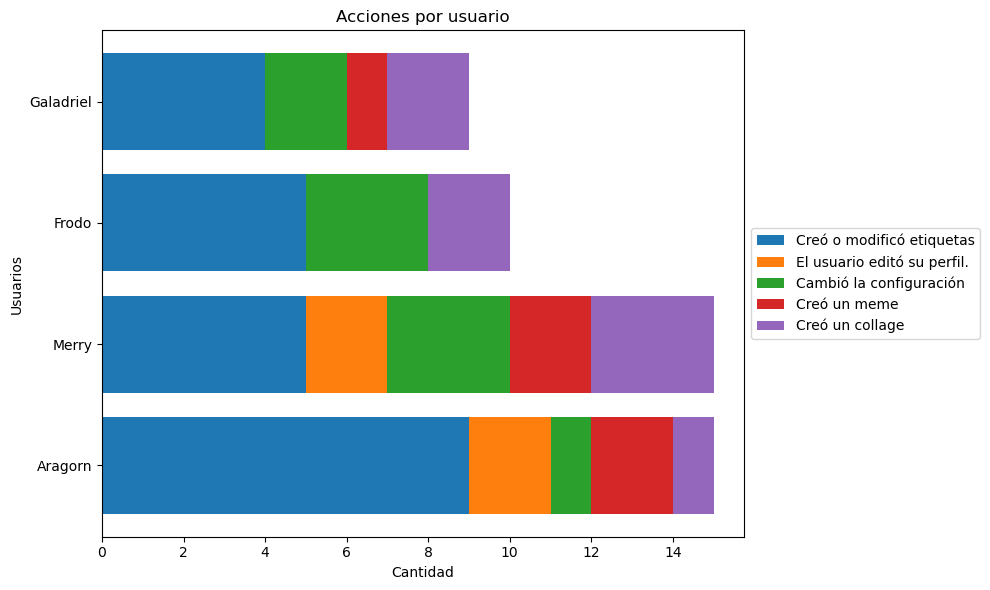

In [9]:
#Para generar el gráfico, primero detectaremos cuántos son y qué nombre tienen los usuarios que usaron la aplicación.
#Con el atributo unique() de pandas nos quedaremos sólo con los nombres de usuario sin sus repeticiones.

users = df["User"].unique()

#Generamos listas vacías en las cuales nos apoyaremos para hacer el recuento de acciones realizadas por cada usuario.

etiquetas_nuevas = []
etiquetas_cambios = []
editoperfil = []
configuracion = []
memes = []
collage = []

#Recorremos cada usuario y sumamos la cantidad de veces que realizó cada acción, usando el atributo count().

for name in users:
    etiquetas_nuevas.append(df[(df["Action"] == "Guardó información nueva en las imágenes del directorio") & (df["User"] == name)]["Action"].count())
    etiquetas_cambios.append(df[(df["Action"] == "Modificó información en las imágenes del directorio") & (df["User"] == name)]["Action"].count())
    editoperfil.append(df[(df["Action"] == "El usuario editó su perfil.") & (df["User"] == name)]["Action"].count())
    configuracion.append(df[(df["Action"] == "Cambió la configuración") & (df["User"] == name)]["Action"].count())
    memes.append(df[(df["Action"] == "Creó un meme") & (df["User"] == name)]["Action"].count())
    collage.append(df[(df["Action"] == "Creó un collage") & (df["User"] == name)]["Action"].count())

#En el gráfico no diferenciaremos entre guardado de etiquetas nuevas o modificación de ellas.
#Para juntar ambas acciones usamos la función zip en un bucle for, para sumar la cantidad total.

etiquetas = [sum(x) for x in zip(etiquetas_nuevas, etiquetas_cambios)]

#Finalmente con toda la información obtenida del DataFrame, realizamos el histograma.
#De nuevo usando la función zip, que nos permite ir agrupando las acciones ya consideradas para darselas como valor
#a la opción de configuración "left" en plt.barh.

plt.figure(figsize=(10, 6))
plt.barh(users, etiquetas, label='Creó o modificó etiquetas')
plt.barh(users, editoperfil, left=etiquetas, label='El usuario editó su perfil.')
plt.barh(users, configuracion, left=[sum(x) for x in zip(etiquetas, editoperfil)], label='Cambió la configuración')
plt.barh(users, memes, left=[sum(x) for x in zip(etiquetas, editoperfil, configuracion)], label='Creó un meme')
plt.barh(users, collage, left=[sum(x) for x in zip(etiquetas, editoperfil, configuracion, memes)], label='Creó un collage')

plt.xlabel('Cantidad')
plt.ylabel('Usuarios')
plt.title('Acciones por usuario')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()  
plt.show()


### Luego contabilizaremos las acciones realizadas, en total y sin distinguir por usuario.
De todas las acciones registradas en el log, no nos interesa mostrar las acciones "Inició Sesión", "Cerró Sesión" ni "Abrió la ventana de etiquetas pero no generó etiquetas".
Mostraremos en un histograma la cantidad de veces que se realizó cada acción considerada.

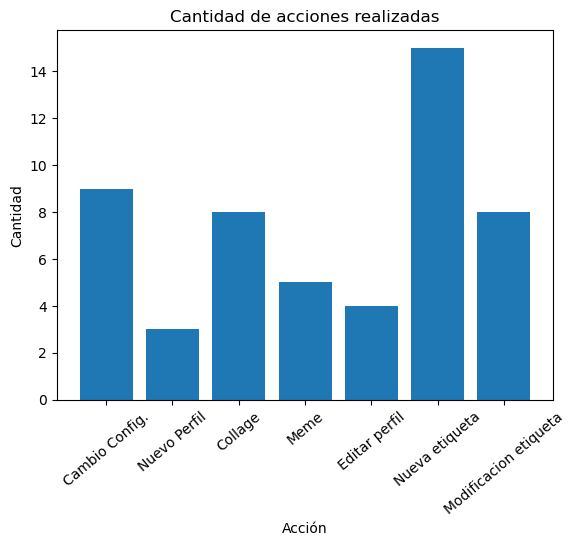

In [75]:
#Excluimos del DataFrame las acciones que no nos interesan
exclude_values = ['Cerró sesión', 'Abrió la ventana de etiquetas pero no generó etiquetas']
filtered_df = df[~df['Action'].isin(exclude_values)]

#Contamos cada acción realizada y las ordenamos. 
value_counts = filtered_df['Action'].value_counts()
value_counts = value_counts.sort_index(ascending=True)

plt.bar(value_counts.index, value_counts.values)

# Definimos labels, nombres de ejes y título del gráfico.
labels = ['Cambio Config.', 'Nuevo Perfil', 'Collage', 'Meme', 'Editar perfil', 'Nueva etiqueta', 'Modificacion etiqueta']
plt.xticks(value_counts.index, labels)
plt.xticks(rotation=40)
plt.xlabel('Acción')
plt.ylabel('Cantidad')
plt.title('Cantidad de acciones realizadas')
plt.show()

### Como siguiente paso, haremos un gráfico de torta mostrando qué porcentaje de generación de etiquetas (tanto nuevas como modificaciones de existentes) fue realizado por género de los usuarios registrados.

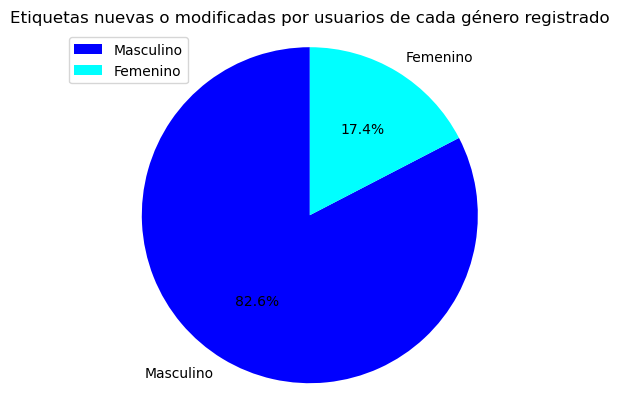

In [11]:
#Primero, detectamos con qué géneros se han registrado los usuarios.
#Recordemos que el programa permite elegir entre diferentes opciones, pero si el usuario no se siente identificado
#con ninguna de las opciones, puede introducir una nueva opción. De esta manera, no sabemos a priori cuáles son las
#opciones posibles de géneros en el log.

gens = []

for name in df["User"]:
    gens.append(df_users[name]["genero"])
df["Generos"] = gens

gen_unicos = df["Generos"].unique()

#Una vez armada la lista de géneros, haremos el gráfico de manera similar como hicimos el primero de esta sección.
suma = []
for gen in gen_unicos:
    count = ((df["Generos"] == gen) & ((df["Action"] == "Guardó información nueva en las imágenes del directorio") | (df["Action"] == "Modificó información en las imágenes del directorio")) ).sum()
    suma.append(count)
    
#Usamos plt.pie de matplotlib para genera el gráfico de torta.
plt.pie(suma, labels=gen_unicos, colors=['blue', 'cyan'], autopct='%1.1f%%', startangle=90)


plt.axis('equal')


plt.legend(loc='upper left')

plt.title("Etiquetas nuevas o modificadas por usuarios de cada género registrado")

plt.show()


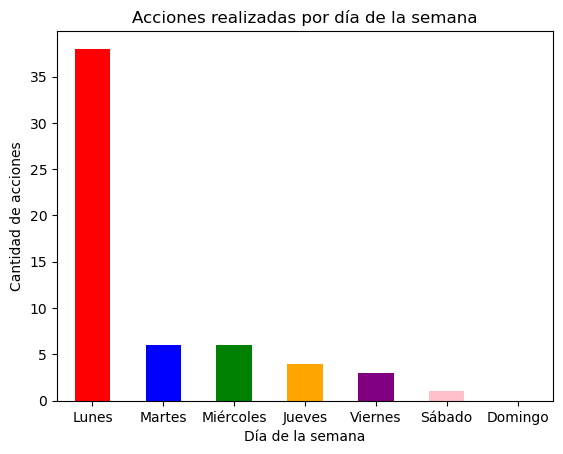

In [26]:
weekday_mapping = {
    'Monday': 'Lunes',
    'Tuesday': 'Martes',
    'Wednesday': 'Miércoles',
    'Thursday': 'Jueves',
    'Friday': 'Viernes',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}
day_order = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
df['Time'] = pd.to_datetime(df['Time'], format='%d-%m-%y %H:%M:%S')
df['DayOfWeek'] = df['Time'].dt.day_name().map(weekday_mapping)
df['DayOfWeek'] = pd.Categorical(df['DayOfWeek'], categories=day_order, ordered=True)

actions_by_day = df['DayOfWeek'].value_counts().sort_index()


actions_by_day.plot(kind='bar', color=["red", "blue", "green", "orange", "purple", "pink", "yellow"])


plt.xlabel('Día de la semana')
plt.ylabel('Cantidad de acciones')
plt.title('Acciones realizadas por día de la semana')
plt.xticks(rotation=0)

plt.show()



In [6]:
df_tags = pd.read_csv(os.path.join(sys.path[0], 'src', 'users-data', 'tags.csv'), encoding='utf-8')

df_tags

,path,description,resolution,size,mimetype,tags,last user,last edit time
0,/home/mceli/ssd/Doctorado/Curso_python/UNLPIma...,"Jim Morrison, cantante de The Doors","(1350, 759)",190.6 KB,image/jpeg,"['Morrison', 'Música', 'TheDoors']",Aragorn,05-06-23 13:54:41
1,/home/mceli/ssd/Doctorado/Curso_python/UNLPIma...,NaN,"(550, 412)",58.4 KB,image/jpeg,"['Aconcagua', 'Montaña', 'Mendonza', 'Paisaje']",Aragorn,05-06-23 13:55:02
2,/home/mceli/ssd/Doctorado/Curso_python/UNLPIma...,"Foto aerea de la ciudad de Napoles, en el sur ...","(875, 600)",117.1 KB,image/jpeg,"['Napoli', 'Paisaje', 'Ciudad', 'Italia']",Aragorn,05-06-23 13:55:33
3,/home/mceli/ssd/Doctorado/Curso_python/UNLPIma...,NaN,"(800, 488)",171.5 KB,image/jpeg,"['Bilardo', 'Estudiantes', 'Gatorade', 'Futbol']",Aragorn,05-06-23 13:55:53
4,/home/mceli/ssd/Doctorado/Curso_python/UNLPIma...,"Foto de las Cataratas del Iguazú en Misiones, ...","(276, 182)",11.5 KB,image/jpeg,"['Iguazú', 'Cataratas', 'Paisaje', 'Argentina']",Aragorn,05-06-23 13:56:29
5,/home/mceli/ssd/Doctorado/Curso_python/UNLPIma...,Maradona jugando en la seleccion de Argentina,"(1066, 1280)",116.7 KB,image/jpeg,"['Diego', 'Fútbol', 'Mundial']",Aragorn,05-06-23 13:57:03
6,/home/mceli/ssd/Doctorado/Curso_python/UNLPIma...,Foto del cantautor cubano Silvio Rodriguez con...,"(650, 650)",41.0 KB,image/jpeg,"['SilvioRodriguez', 'Música', 'Cuba']",Aragorn,05-06-23 13:57:31
7,/home/mceli/ssd/Doctorado/Curso_python/UNLPIma...,"Anilló Único, El Señor de los Anillos","(318, 159)",9.1 KB,image/jpeg,"['LOTR', 'Peliculas', 'Anillo']",Aragorn,05-06-23 13:58:10
8,/home/mceli/ssd/Doctorado/Curso_python/UNLPIma...,Lionel Messi con la Copa del Mundo en el Mundi...,"(1200, 900)",69.6 KB,image/jpeg,"['Messi', 'Campeon', 'Fútbol', 'Qatar']",Aragorn,05-06-23 13:58:39
9,/home/mceli/ssd/Doctorado/Curso_python/UNLPIma...,Foto de Maradona joven,"(670, 670)",96.0 KB,image/png,"['Diego', 'Fútbol', 'Maradona']",Frodo,15-06-23 13:58:39


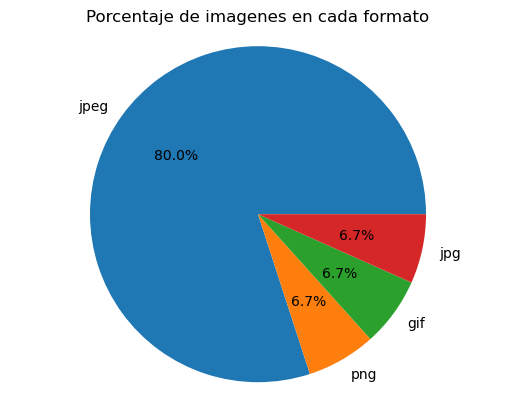

In [7]:
category_counts = df_tags['mimetype'].value_counts(normalize=True) * 100
categories_unique = df_tags['mimetype'].unique()
names = []

for text in categories_unique:
    names.append(text.split("/")[1])

plt.pie(category_counts, labels=names, autopct='%1.1f%%')
plt.axis('equal')  
plt.title('Porcentaje de imagenes en cada formato')

plt.show()

In [8]:
import re

resolutions = df_tags['resolution'].tolist()

first_elements = [int(re.findall(r'\((\d+)', res)[0]) for res in resolutions]

max_value_height = max(first_elements)
min_value_height = min(first_elements)

last_elements = [int(re.findall(r'\(\d+, (\d+)\)', res)[0]) for res in resolutions]

max_value_wide = max(last_elements)
min_value_wide = min(last_elements)

print('Máximo alto: '+str(max_value_height))

print('Máximo ancho: '+str(max_value_wide))

Máximo alto: 1350
Máximo ancho: 1280


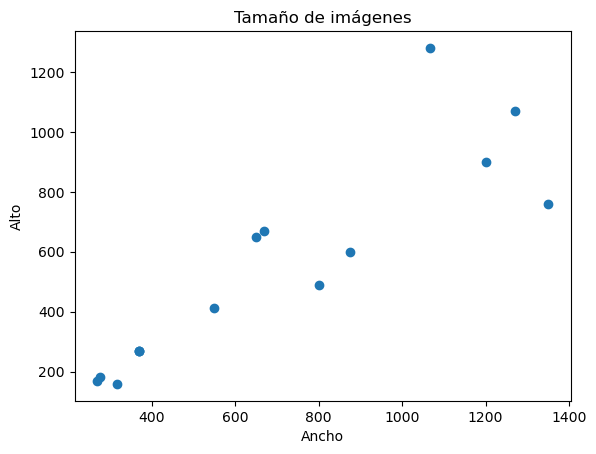

In [9]:
plt.scatter(first_elements,last_elements)

plt.title('Tamaño de imágenes')
plt.xlabel('Ancho')
plt.ylabel('Alto')
plt.show()

In [100]:
import ast
from collections import Counter
tags = []
tags_aux = df_tags['tags'].tolist()

for t in tags_aux:
    tags.append(ast.literal_eval(t))

single_list = [item for sublist in tags for item in sublist]

count = Counter(single_list)
top = count.most_common(3)

top

[('Paisaje', 3), ('Fútbol', 3), ('Fantasía', 3)]

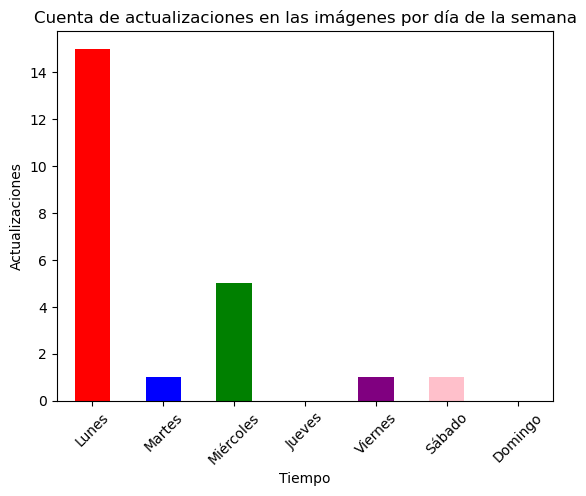

In [53]:
condition = ((df["Action"] == "Guardó información nueva en las imágenes del directorio") | (df["Action"] == "Modificó información en las imágenes del directorio"))
filtered_df = df[condition]

count = (pd.to_datetime(filtered_df['Time'], format='%d-%m-%y %H:%M:%S')).dt.day_name().map(weekday_mapping)#.value_counts().sort_index()

count = pd.Categorical(count, categories=day_order, ordered=True)
(count.value_counts().sort_index()).plot(kind='bar', color=["red", "blue", "green", "orange", "purple", "pink", "yellow"])


plt.xlabel('Tiempo')
plt.ylabel('Actualizaciones')
plt.title('Cuenta de actualizaciones en las imágenes por día de la semana')
plt.xticks(rotation=45)
plt.show()

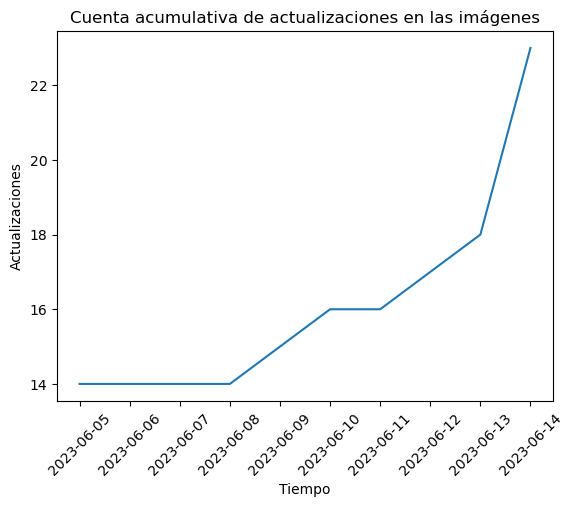

In [21]:
df['Timestamp'] = pd.to_datetime(df['Time'])
condition = ((df["Action"] == "Guardó información nueva en las imágenes del directorio") | (df["Action"] == "Modificó información en las imágenes del directorio"))
filtered_df = df[condition]
grouped_df = filtered_df.groupby(pd.Grouper(key='Timestamp', freq='D')).size().cumsum()

plt.plot(grouped_df.index, grouped_df.values)
plt.xlabel('Tiempo')
plt.ylabel('Actualizaciones')
plt.title('Cuenta acumulativa de actualizaciones en las imágenes')
plt.xticks(rotation=45)
plt.show()

In [12]:
from functools import reduce 
users = df_tags['last user'].unique()
size_user = [] 
filtered_values = []
float_numbers = []
rank = []
for name in users:
    filtered_values.append((df_tags.loc[df_tags['last user'] == name, 'size']))
    #float_numbers = [float(num) for num in str(filtered_values).split(' ') if re.match(r'^\d+\.\d+$', num)]
#str(filtered_values[0]).split(' ')
for sizes in filtered_values:
    float_numbers.append([float(num) for num in str(sizes).split(' ') if re.match(r'^\d+\.\d+$', num)])
for sizes, names in zip(float_numbers, users):
    lst_avg = reduce(lambda x, y: x + y, sizes) /len(sizes)
    rank.append((names, round(lst_avg, 2)))
rank = sorted(rank, key=lambda x: x[1], reverse = True)

df_aux = pd.DataFrame(rank, columns=['User', 'Averge Image Size [KB]'])
df_aux

,User,Averge Image Size [KB]
0,Frodo,146.00
1,Merry,92.00
2,Aragorn,87.28
3,Galadriel,82.67


In [149]:
condition = (df["Action"] == "Creó un meme") 
filtered_df = df[condition]

from collections import Counter
tags = []
tags_aux = filtered_df['Values'].tolist()

for t in tags_aux:
    tags.append(ast.literal_eval(t))

single_list = [item for sublist in tags for item in sublist]

count = Counter(single_list)
top = count.most_common(5)

df_aux = pd.DataFrame(top, columns=['Imagen', 'Cantidad de usos en memes'])
df_aux

,User,Averge Image Size [KB]
0,messi-copa.jpg,2
1,comida.jpg,1
2,anillo.jpeg,1
3,sombrero2.jpg,1
4,maradona-imagen-tyc.jpg,1


In [160]:
condition = (df["Action"] == "Creó un collage") 
filtered_df = df[condition]
filtered_df
from collections import Counter
tags = []
tags_aux = filtered_df['Values'].tolist()

for t in tags_aux:
    tags.append(ast.literal_eval(t))

single_list = [item for sublist in tags for item in sublist]

count = Counter(single_list)
top = count.most_common(5)

df_aux = pd.DataFrame(top, columns=['Imagen', 'Cantidad de usos en collages'])
df_aux

,Imagen,Cantidad de usos en collages
0,diego.png,4
1,messi-copa.jpg,4
2,anillo.jpeg,3
3,comarca.gif,3
4,magia.jpeg,1


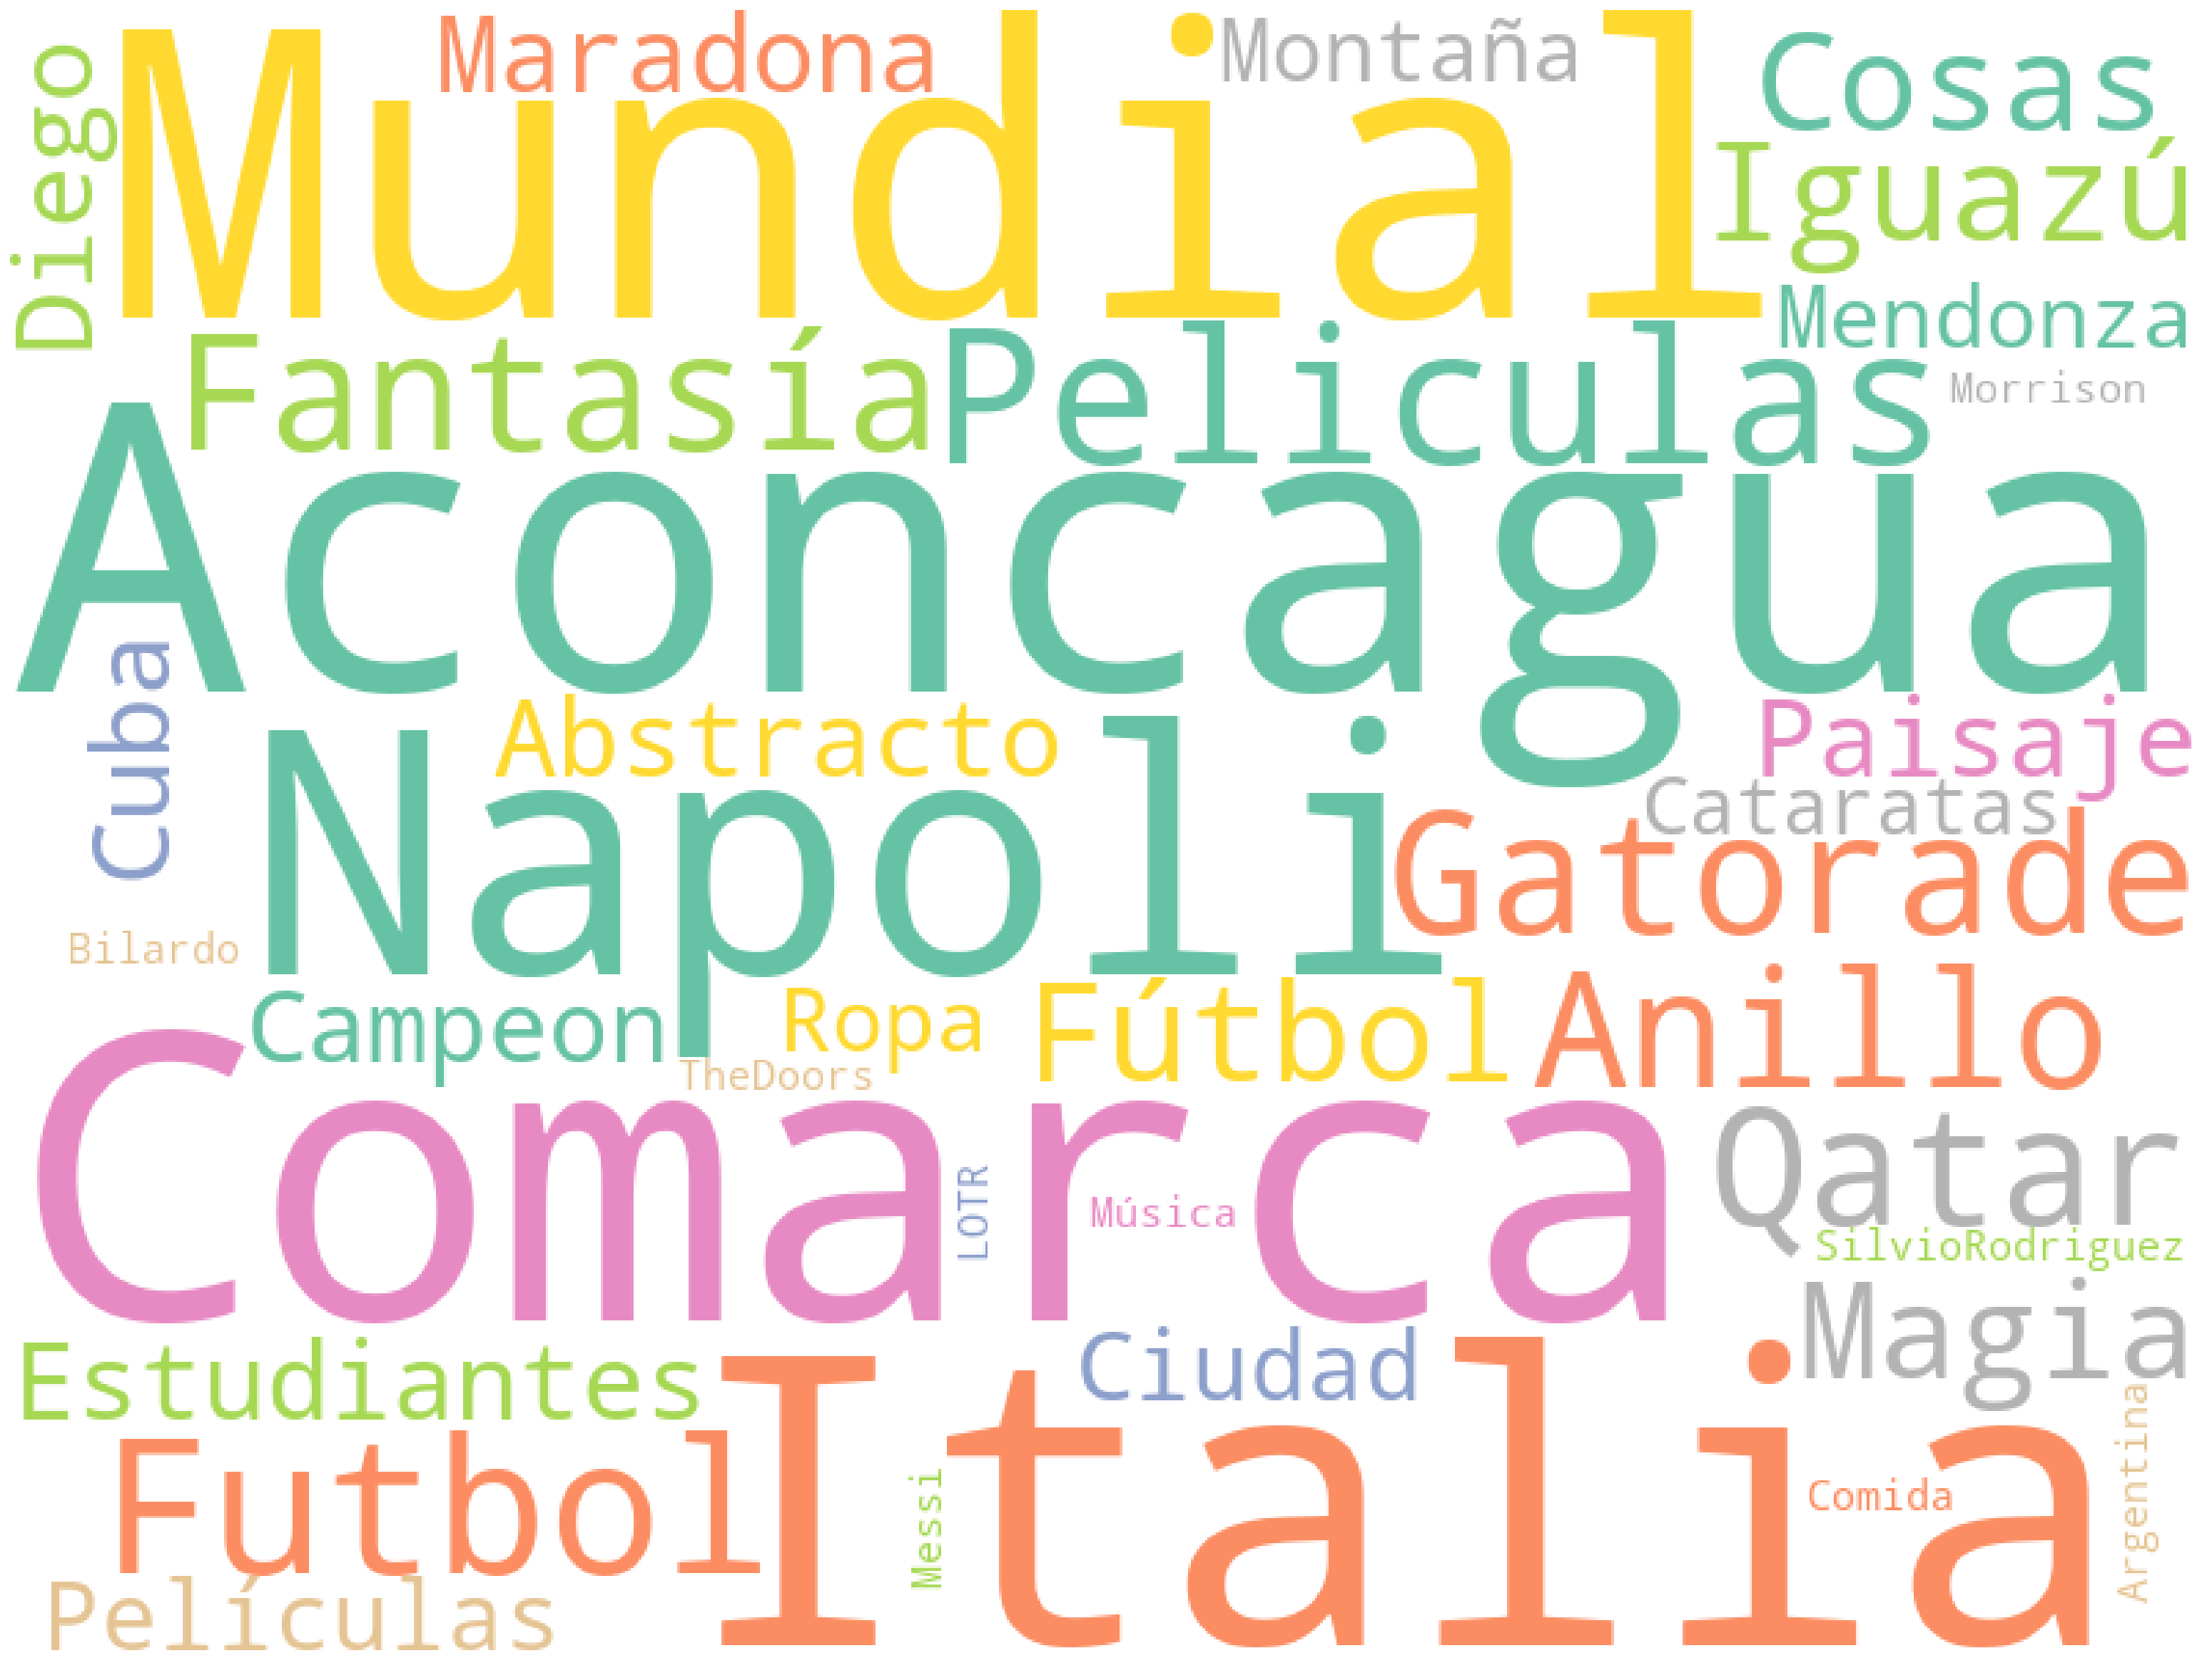

In [175]:
from wordcloud import WordCloud, STOPWORDS

tags_aux = df_tags['tags'].tolist()

for t in tags_aux:
    tags.append(ast.literal_eval(t))

single_list = list(set([item for sublist in tags for item in sublist]))

# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");
    
text = str(single_list)
text = text.replace("'", "").replace("[", "").replace("]", "")
#print(text)
# Generate wordcloud
wordcloud = WordCloud(width = 800, height = 600, random_state=1, background_color='white', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(text)
# Plot
plot_cloud(wordcloud)

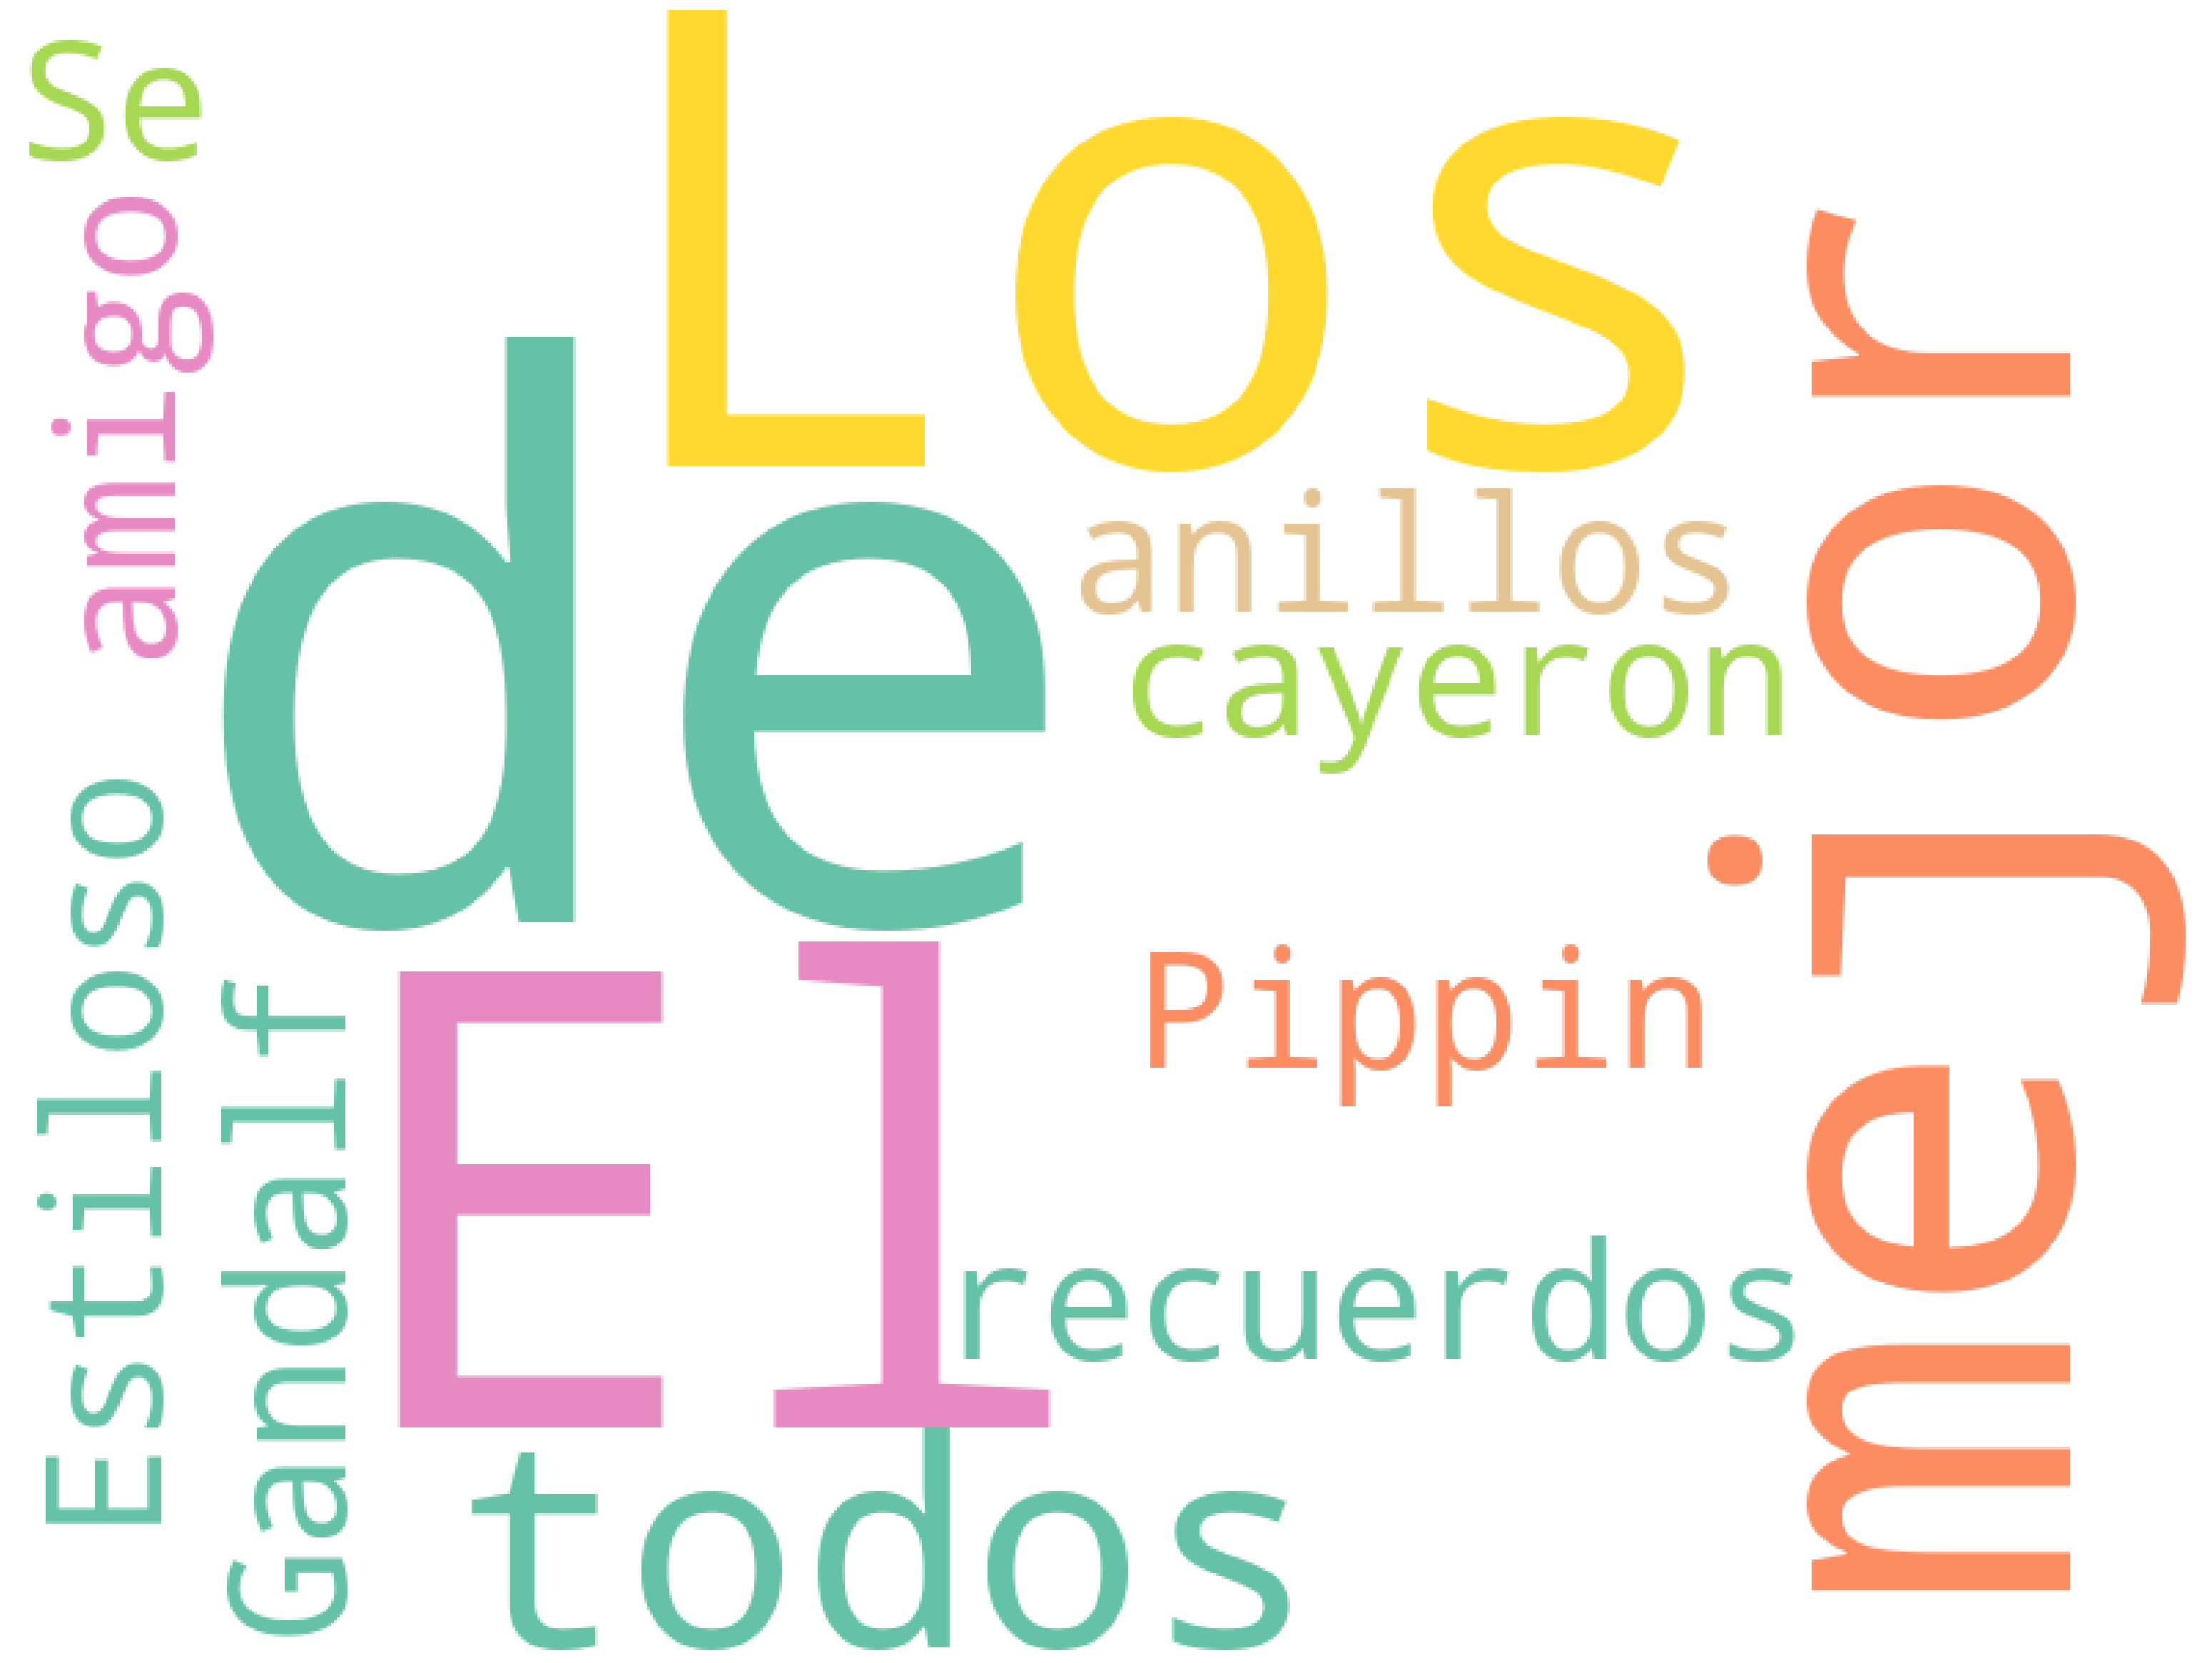

In [183]:
condition = (df["Action"] == "Creó un meme") 
filtered_df = df[condition]


# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");
text = str(filtered_df['Texts'].tolist())
text = text.replace("'", "").replace("[", "").replace("]", "")
#print(text)
# Generate wordcloud
wordcloud = WordCloud(width = 800, height = 600, random_state=1, background_color='white', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(text)
# Plot
plot_cloud(wordcloud)

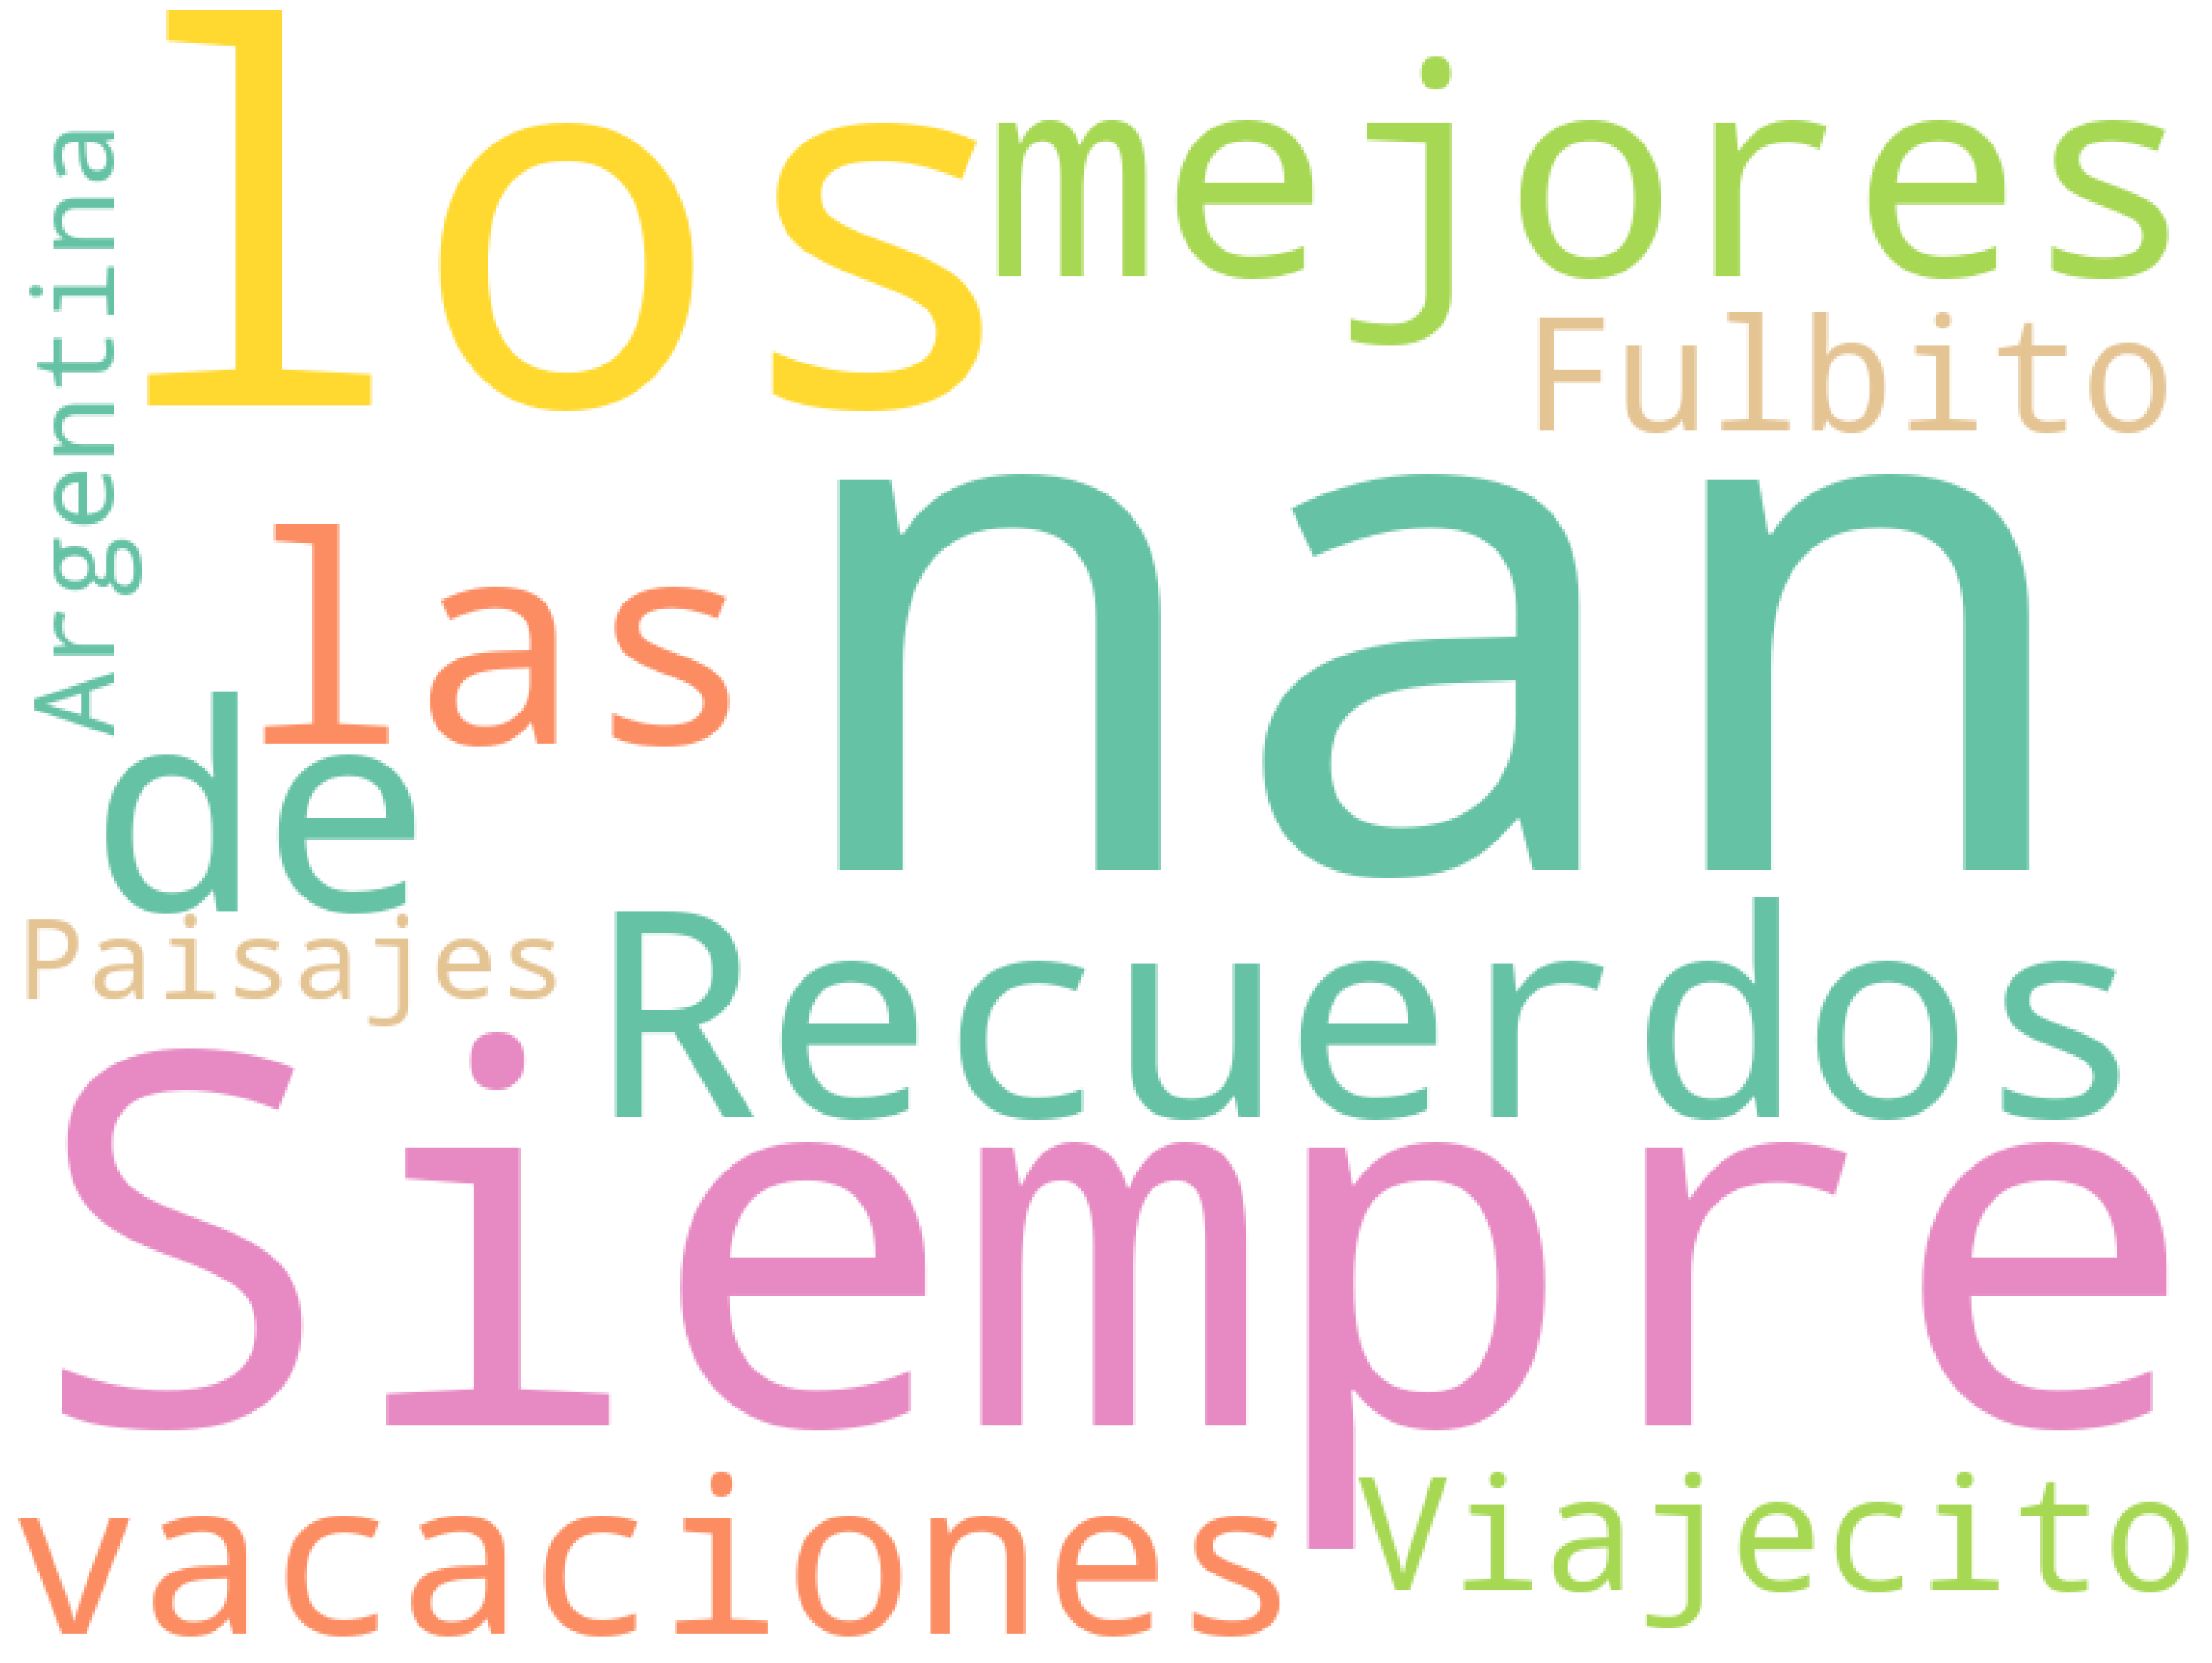

In [184]:
condition = (df["Action"] == "Creó un collage") 
filtered_df = df[condition]


# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");
text = str(filtered_df['Texts'].tolist())
text = text.replace("'", "").replace("[", "").replace("]", "")
#print(text)
# Generate wordcloud
wordcloud = WordCloud(width = 800, height = 600, random_state=1, background_color='white', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(text)
# Plot
plot_cloud(wordcloud)